In [3]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [4]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [15]:
img_name = 'img1.png'
raw_img = cv2.imread(img_name)
raw_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)

In [16]:
img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
img.shape

(600, 900, 3)

In [17]:
img = img.reshape(img.shape[0]*img.shape[1], 3)
img.shape

(540000, 3)

In [18]:
img

array([[124, 171, 246],
       [124, 171, 246],
       [124, 171, 246],
       ...,
       [107, 191, 246],
       [107, 191, 246],
       [107, 191, 246]], dtype=uint8)

In [19]:
clf = KMeans(n_clusters =5)
color_labels = clf.fit_predict(img)
center_colors = clf.cluster_centers_

In [20]:
color_labels

array([3, 3, 3, ..., 3, 3, 3])

In [21]:
center_colors

array([[104.92673058, 162.26646094, 193.01919109],
       [ 53.97181894,  83.97808022,  49.4334435 ],
       [177.14711519, 206.79183615, 250.36862912],
       [125.89511651, 185.54119852, 247.32226022],
       [193.47783504, 128.63727472,  25.08604049]])

In [22]:
counts = Counter(color_labels)
counts

Counter({3: 131276, 2: 166479, 0: 112415, 1: 94707, 4: 35123})

In [23]:
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
hex_colors

['#355331', '#68a2c1', '#7db9f7', '#b1cefa', '#c18019']

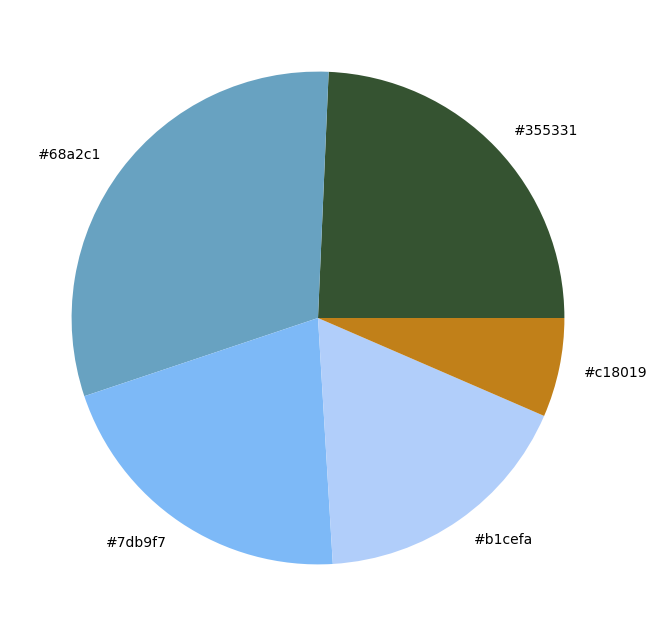

In [24]:
plt.figure(figsize = (12, 8))
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
plt.savefig(f"{img_name[:-4]}-analysis.png")